In [1]:
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import os
import cv2
import math
import utils

def disp_image(image):
    plt.figure(figsize=(25, 25))
    plt.imshow(image)
    plt.show()

2021-07-24 13:30:37.282649: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


(3348, 2321)


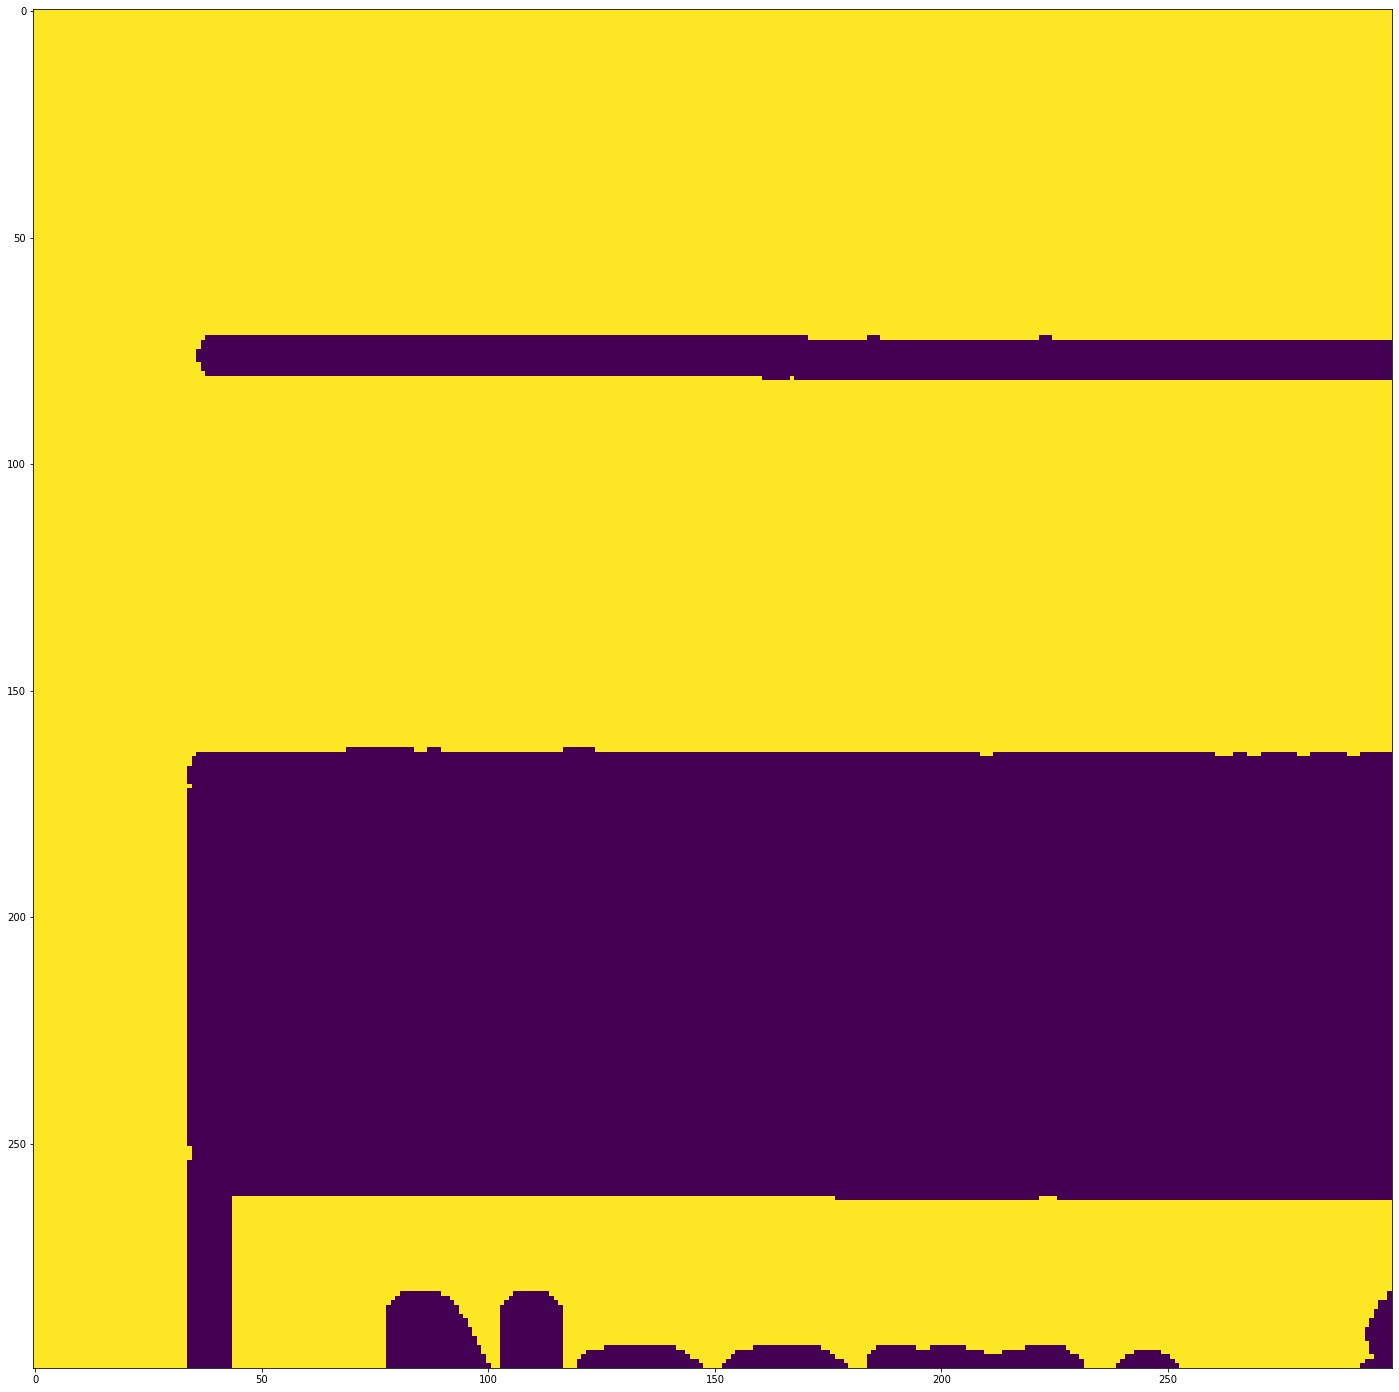

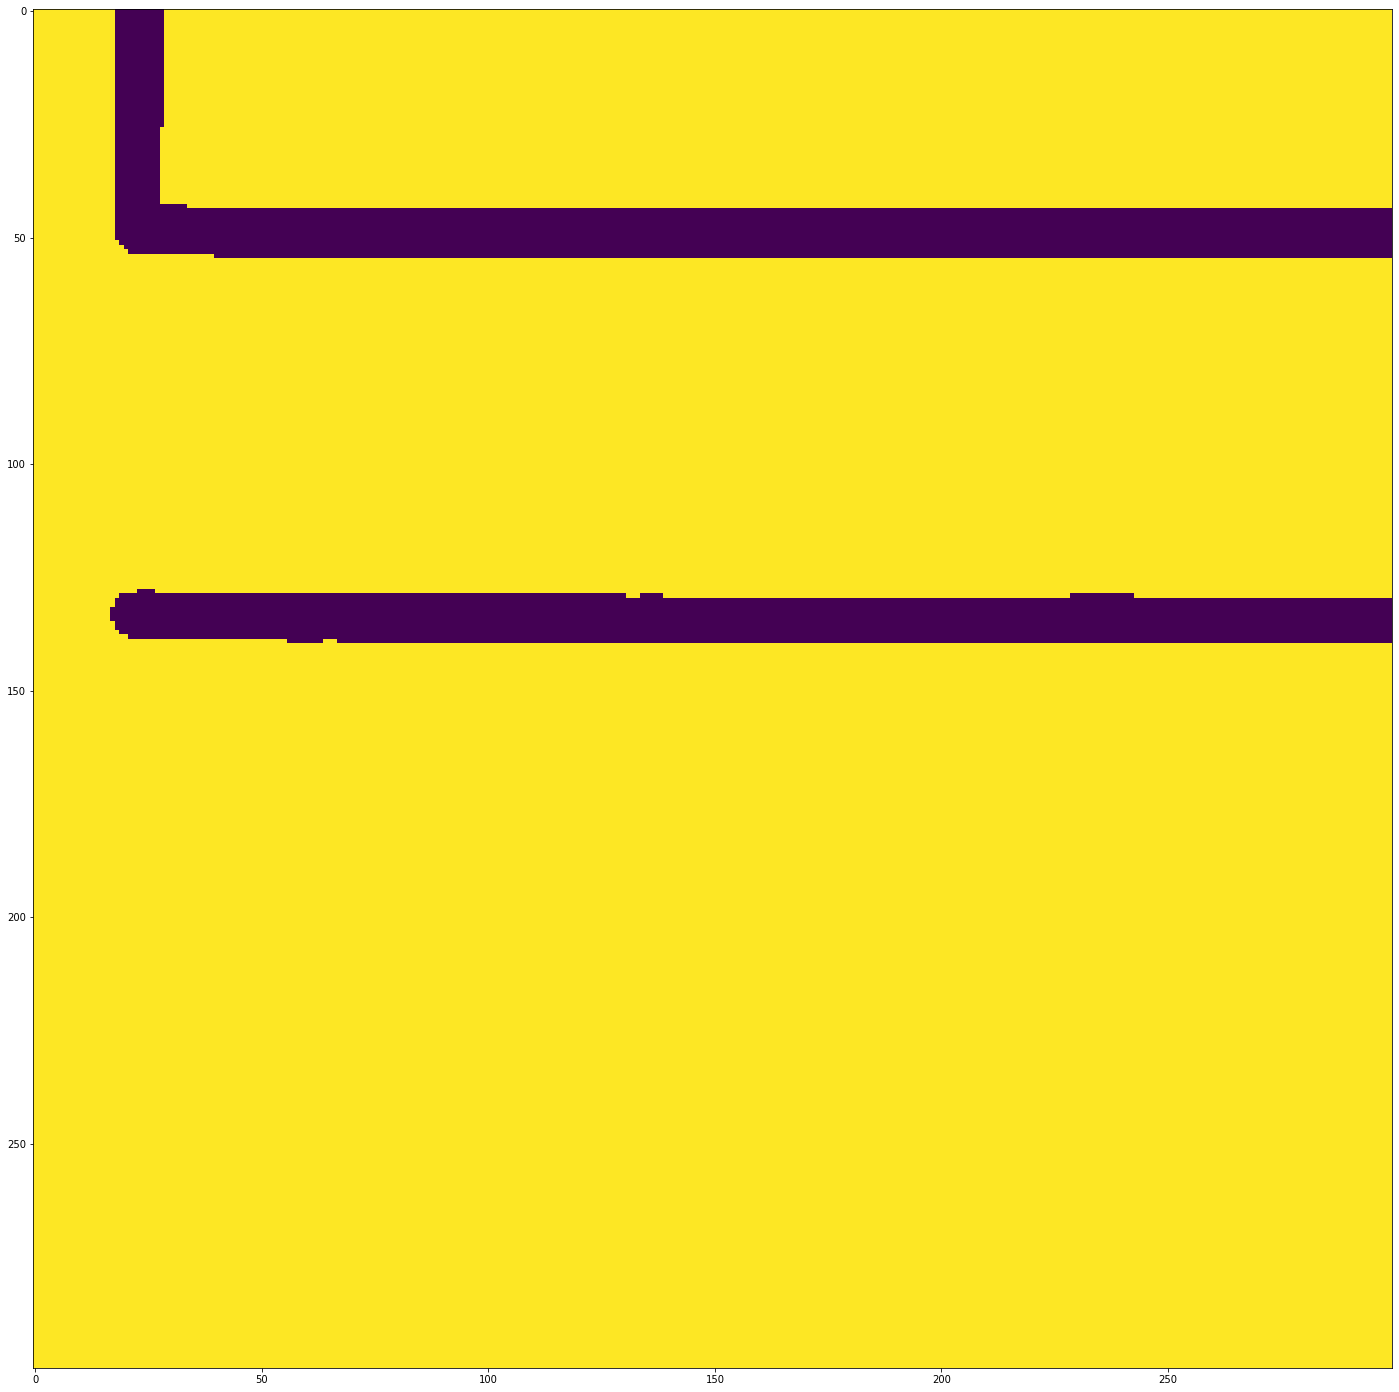

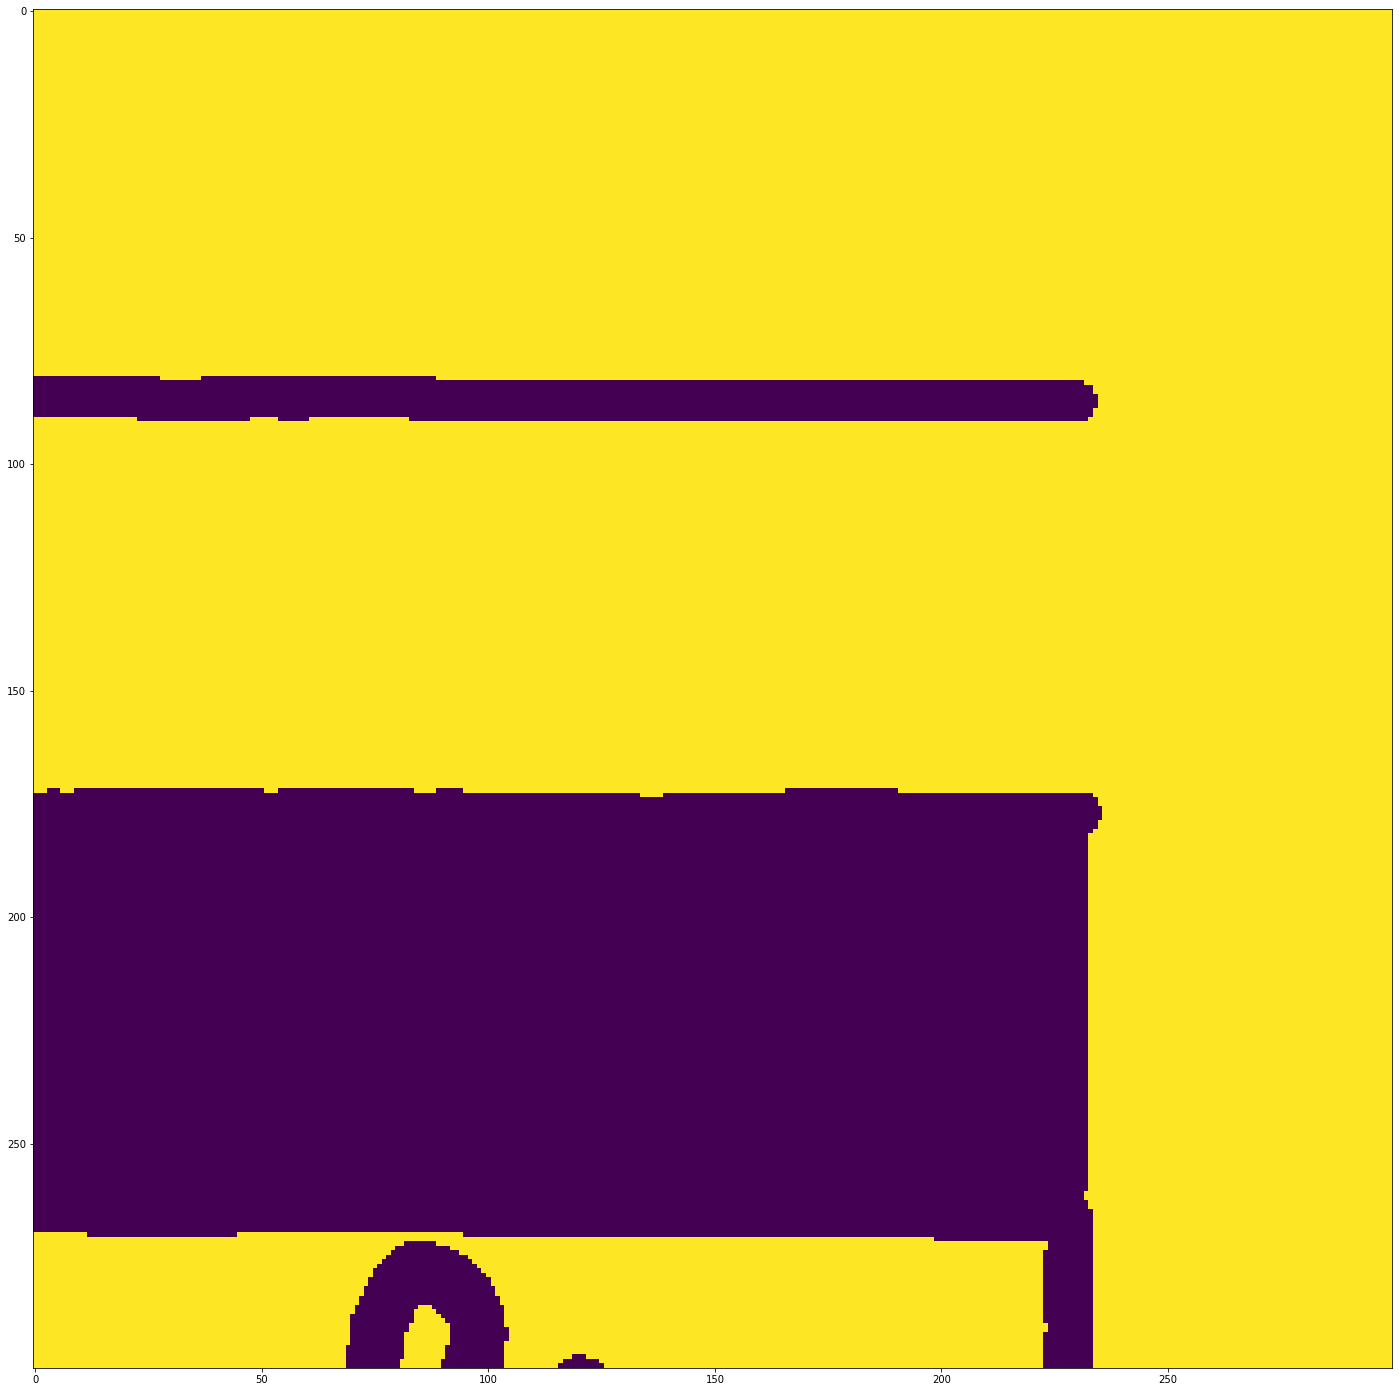

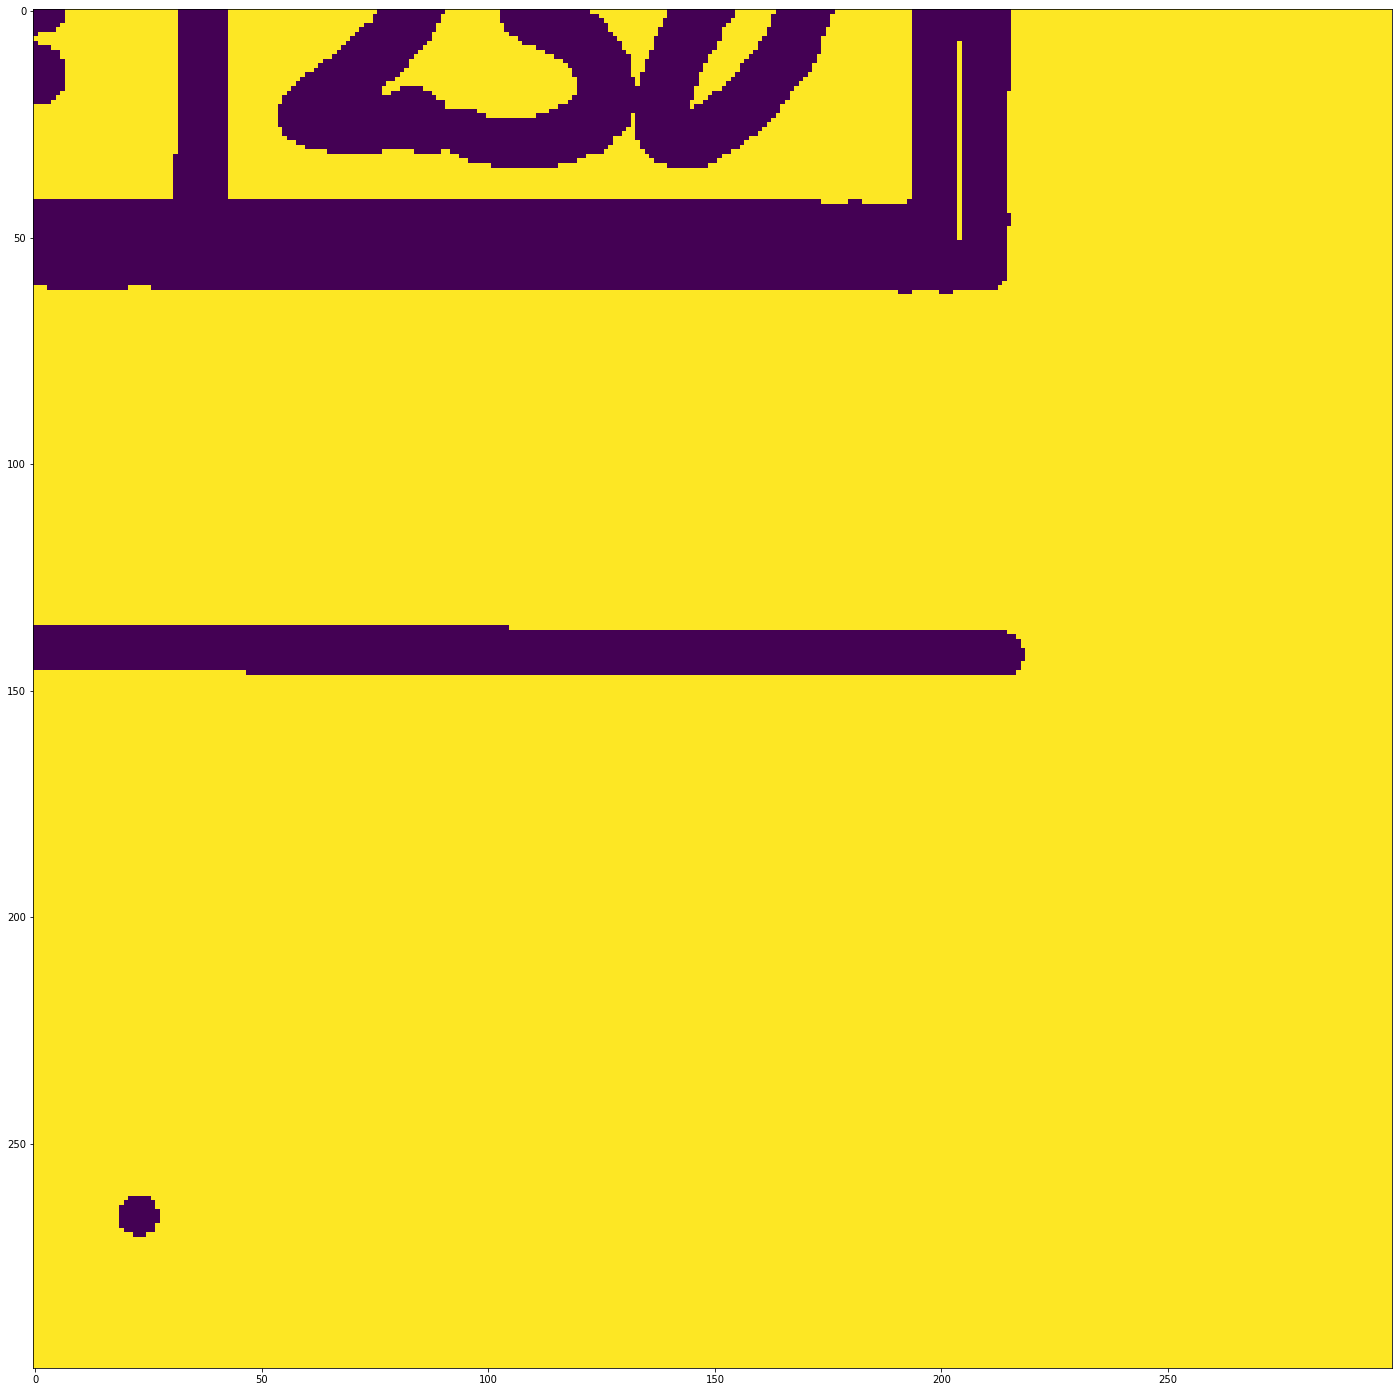

In [36]:
orig = cv2.imread("/home/dan/Downloads/poulespng/poule-7.pdf.png", cv2.IMREAD_UNCHANGED)
tmpl = cv2.imread("./data/pngs/poule-front-content-tmpl.png", cv2.IMREAD_UNCHANGED)

blur_amount = (9, 9)
crop_margin_px = 80

debug = True

# Crop inward, there won't be anything at the edges except for scanning artifacts
orig = orig[crop_margin_px:-crop_margin_px, crop_margin_px:-crop_margin_px]

img_gray = cv2.cvtColor(orig, cv2.COLOR_BGR2GRAY)
img_gray = cv2.GaussianBlur(img_gray, blur_amount, 0)
th, thresh = cv2.threshold(img_gray, 254, 255, cv2.THRESH_BINARY)

corner_crop_px = 300
print(thresh.shape)
tl = thresh[
    0:corner_crop_px, 
    0:corner_crop_px
]
bl = thresh[
    thresh.shape[0] - corner_crop_px:thresh.shape[0],
    0:corner_crop_px
]
tr = thresh[
    0:corner_crop_px, 
    thresh.shape[1] - corner_crop_px:thresh.shape[1]
]
br = thresh[
    thresh.shape[0] - corner_crop_px:thresh.shape[0],
    thresh.shape[1] - corner_crop_px:thresh.shape[1]
]
disp_image(tl)
disp_image(bl)
disp_image(tr)
disp_image(br)
# TODO now find most extreme pixels
# The location that we return should remap onto the original image
# So tl = found extreme corner = tl_xc.y + any_offset coming from other cropping
# Or we just don't care:
# - Crop naive to strip artifacts
# - Crom to content
# - Find corners
# - hindHomography()
# - persectiveWarp()
# - Resize
# - ...
# - Profit